In [43]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
# Variable Definitions
CSV_FILE_PATH = os.path.join('archive', 'diabetes.csv')

In [45]:
data = pd.read_csv(CSV_FILE_PATH)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Decision Tree

In [46]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [48]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [70]:
decision_tree_accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 81.17%


In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

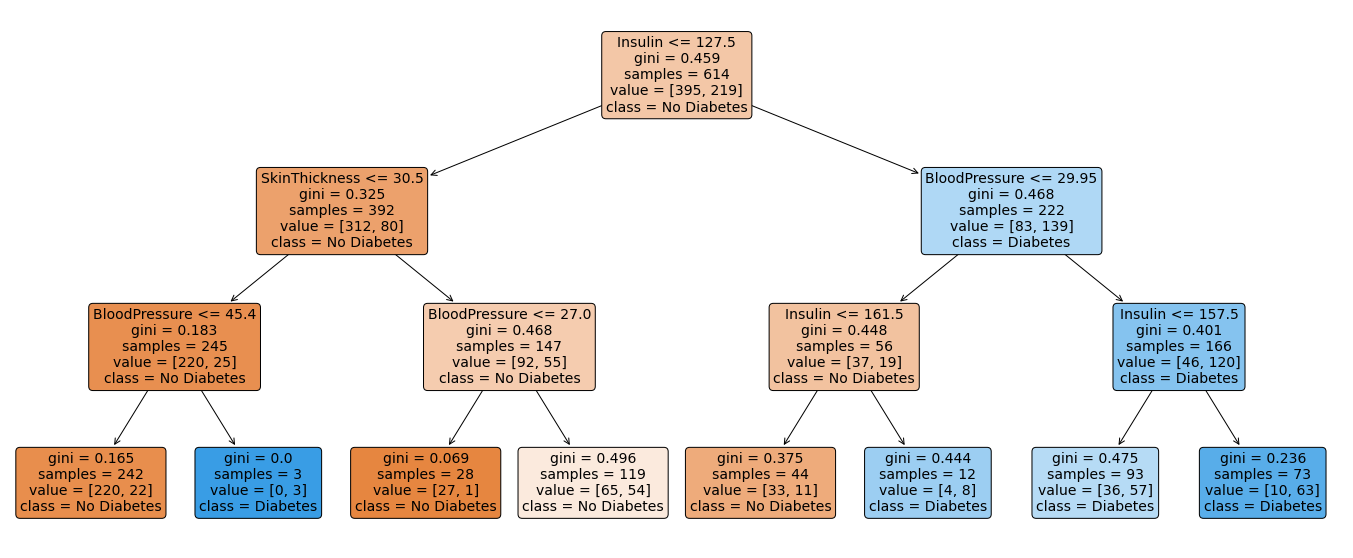

In [51]:
class_names = ['No Diabetes', 'Diabetes']
feature_names = list(data.columns)
plt.figure(figsize=(24,10))
tree.plot_tree(classifier, fontsize=14, class_names=class_names, feature_names=feature_names, filled=True, rounded=True)
plt.show()

# Logistic Regression

In [52]:
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [53]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)



In [54]:
dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_train, y_train)
dataCheck.coef_

array([[ 0.12569072, -0.00147694,  0.08140142,  0.01176938,  0.03280466,
        -0.00609001,  0.82711259]])

In [83]:
logistic_regression_accuracy = dataCheck.score(x_test, y_test) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 82.47%


[Text(0, 0, '-0.00609001'),
 Text(0, 0, '-0.00147694'),
 Text(0, 0, '0.0117694'),
 Text(0, 0, '0.0328047'),
 Text(0, 0, '0.0814014'),
 Text(0, 0, '0.125691'),
 Text(0, 0, '0.827113')]

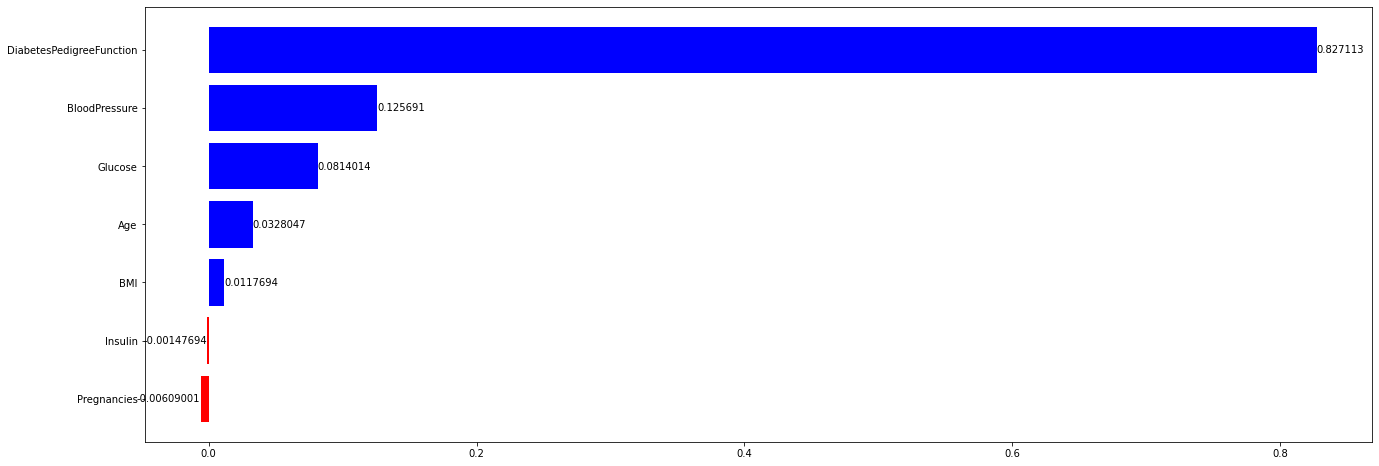

In [56]:
labels = list(x_train.columns)
coeff = list(dataCheck.coef_[0])
coeff = sorted(coeff)
sorted_coeff = list(range(len(coeff)))

fig, ax = plt.subplots(figsize=(22,8))

colors = list(map(lambda x: 'blue' if x > 0 else 'red', coeff))

ax.barh(sorted_coeff, coeff, color=colors)
ax.set_yticks(sorted_coeff)
ax.set_yticklabels(labels)

ax.bar_label(ax.containers[0])

# Random Forest

In [57]:
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [58]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [59]:
random_forest = RandomForestClassifier().fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [60]:
f'Accuracy: {random_forest.score(x_test, y_pred) * 100:.2f}%'

'Accuracy: 100.00%'

In [75]:
rf_params_ = {'n_estimators': [*range(100,700+1,100)],
              'min_samples_split': [*range(2,10+1)],
              'min_samples_leaf': [*range(1,10+1)]}

rf_model = RandomForestClassifier(random_state=34)

rf_cv_model = RandomizedSearchCV(rf_model, rf_params_, cv=5, n_jobs=-1, verbose=1).fit(x_train, y_train)
rf_cv_model = RandomForestClassifier(**rf_cv_model.best_params_).fit(x_train, y_train)
y_pred = rf_cv_model.predict(x_test)
random_forest_accuracy = random_forest.score(x_test, y_pred) * 100
f'Accuracy after Cross Validation: {random_forest_accuracy:.2f}%'

Fitting 5 folds for each of 10 candidates, totalling 50 fits


'Accuracy after Cross Validation: 93.51%'

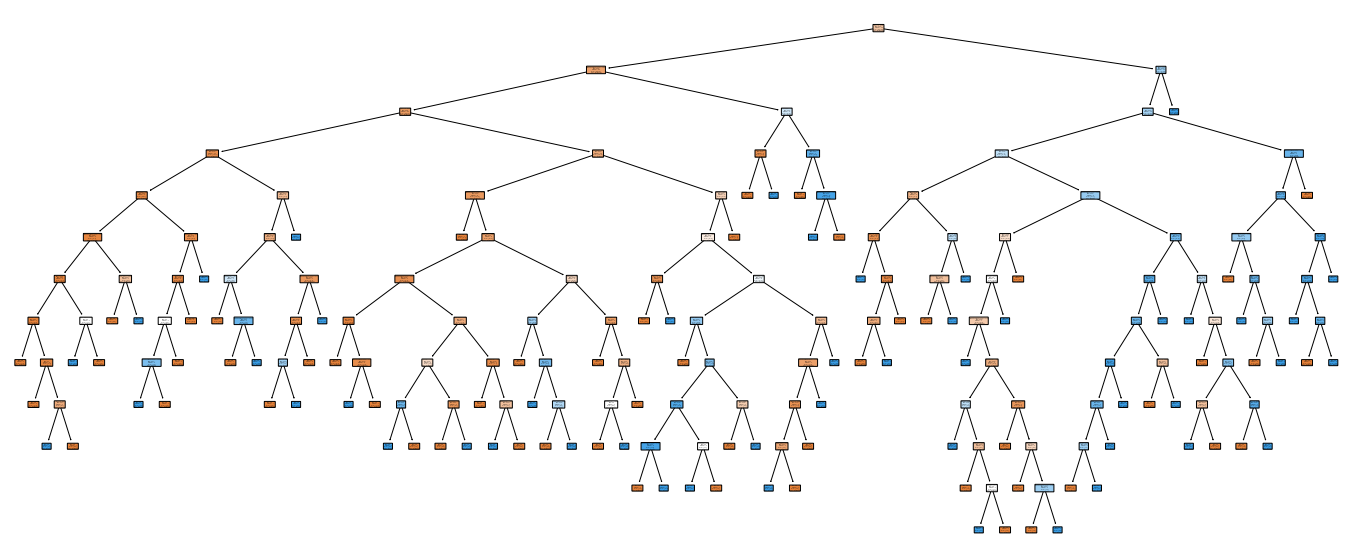

In [62]:
class_names = ['No Diabetes', 'Diabetes']
feature_names = list(data.columns)
plt.figure(figsize=(24,10))
tree.plot_tree(random_forest.estimators_[0], fontsize=1, class_names=class_names, feature_names=feature_names, filled=True, rounded=True) 
plt.show()

[Text(0, 0, '0.084754'),
 Text(0, 0, '0.0924891'),
 Text(0, 0, '0.0936911'),
 Text(0, 0, '0.145389'),
 Text(0, 0, '0.150368'),
 Text(0, 0, '0.173688'),
 Text(0, 0, '0.259621')]

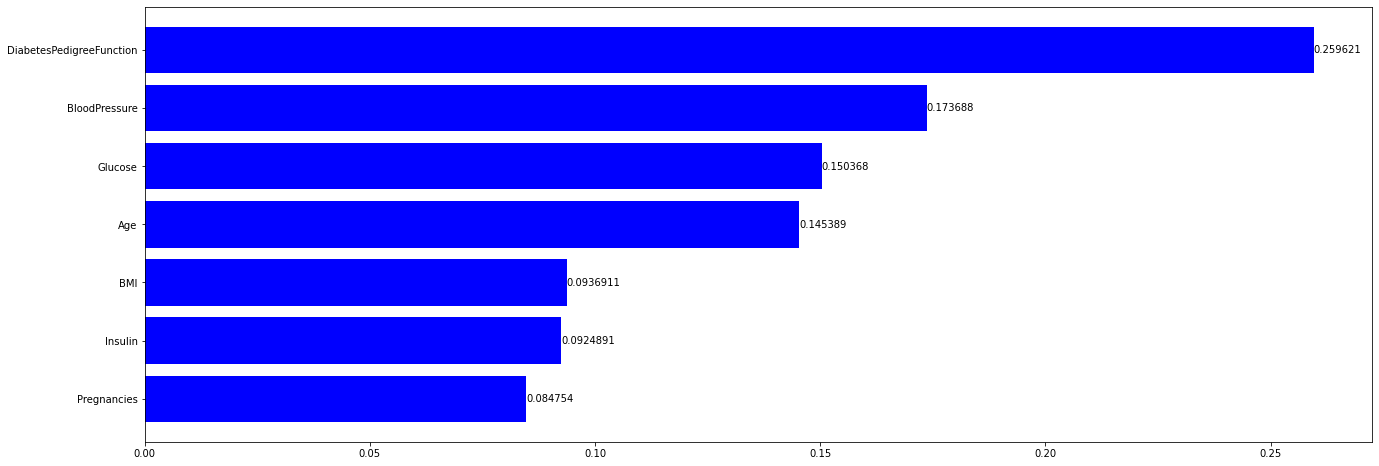

In [63]:
labels = list(x_train.columns)
coeff = list(random_forest.feature_importances_)
coeff = sorted(coeff)
sorted_coeff = list(range(len(coeff)))

fig, ax = plt.subplots(figsize=(22,8))

colors = list(map(lambda x: 'blue' if x > 0 else 'red', coeff))

ax.barh(sorted_coeff, coeff, color=colors)
ax.set_yticks(sorted_coeff)
ax.set_yticklabels(labels)

ax.bar_label(ax.containers[0])

# Comparison Between All Models

In [132]:
import seaborn as sns
import pandas as pd

{'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'], 'Accuracy': [81.16883116883116, 82.46753246753246, 93.5064935064935]}


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

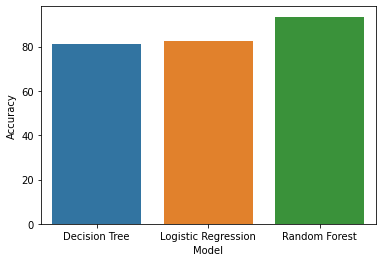

In [133]:
accuracy_dict = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [decision_tree_accuracy, logistic_regression_accuracy, random_forest_accuracy]
}

print(accuracy_dict)

accuracy = pd.DataFrame(data=accuracy_dict)

acc = accuracy.groupby('Accuracy').sum().reset_index()

accuracy.head()

sns.barplot(x='Model', y='Accuracy', data=acc)